In [12]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [13]:

data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


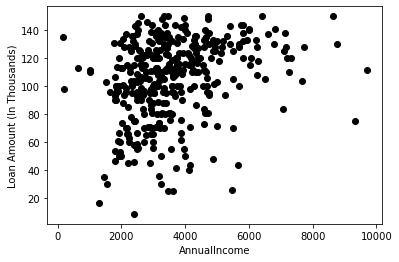

In [14]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

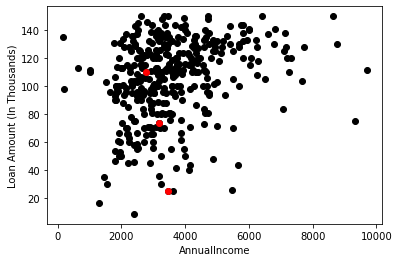

In [15]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()


In [16]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
#     print(X)
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print("Difference::",diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Difference:: 620.7136994038771
Difference:: 423.82246962892947
Difference:: 335.3372772510225
Difference:: 183.13867566110446


C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Difference:: 190.3317152975772
Difference:: 320.86544014225217
Difference:: 235.63273762230665
Difference:: 248.74878646215663


C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Difference:: 125.16501318300665
Difference:: 52.84741626127729
Difference:: 98.54724443834282
Difference:: 90.64953219227577


C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Difference:: 18.274686272279013
Difference:: 9.21023994083339
Difference:: 18.345487493007468
Difference:: 46.27013250786139
Difference:: 0.0


C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\User\AppData\Local\Temp/ipykernel_13980/1701315172.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

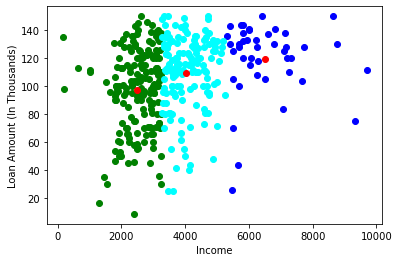

In [17]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [23]:
#using another dataset

import pandas as pd
data = pd.read_csv('driver-data.csv')
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


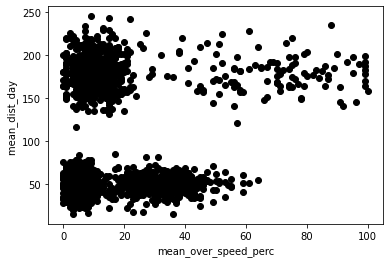

In [24]:
X = data[["mean_dist_day","mean_over_speed_perc"]]
#Visualise data points
plt.scatter(X["mean_over_speed_perc"],X["mean_dist_day"],c='black')
plt.xlabel('mean_over_speed_perc')
plt.ylabel('mean_dist_day ')
plt.show()

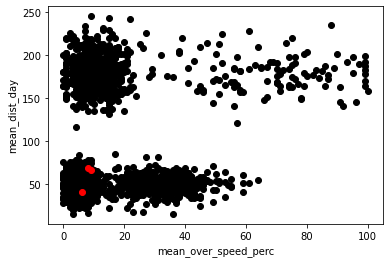

In [25]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["mean_over_speed_perc"],X["mean_dist_day"],c='black')
plt.scatter(Centroids["mean_over_speed_perc"],Centroids["mean_dist_day"],c='red')
plt.xlabel('mean_over_speed_perc')
plt.ylabel('mean_dist_day')
plt.show()


In [26]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["mean_over_speed_perc"]-row_d["mean_over_speed_perc"])**2
            d2=(row_c["mean_dist_day"]-row_d["mean_dist_day"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    print(X)
    Centroids_new = X.groupby(["Cluster"]).mean()[["mean_dist_day","mean_over_speed_perc"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['mean_dist_day'] - Centroids['mean_dist_day']).sum() + (Centroids_new['mean_over_speed_perc'] - Centroids['mean_over_speed_perc']).sum()
        print("Difference::",diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["mean_dist_day","mean_over_speed_perc"]]

      mean_dist_day  mean_over_speed_perc           1           2           3  \
0             71.24                    28   37.622738   19.471713   20.080837   
1             52.53                    25   22.371323   21.559279   23.978075   
2             64.54                    27   31.755195   18.164625   19.621672   
3             55.69                    22   21.911205   17.218133   19.623009   
4             54.58                    25   23.518070   20.242529   22.579185   
...             ...                   ...         ...         ...         ...   
3995         160.04                    10  119.387028   93.065373   90.622072   
3996         176.17                     5  135.453691  109.263242  106.772154   
3997         170.91                    12  130.328186  103.973289  101.548810   
3998         176.14                     5  135.423692  109.233262  106.742166   
3999         168.03                     9  127.345342  101.050000   98.595071   

      Cluster  
0          

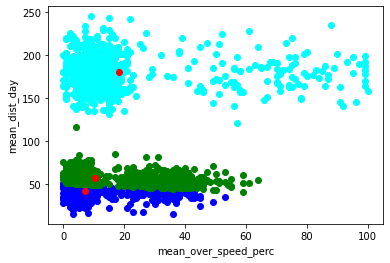

In [27]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["mean_over_speed_perc"],data["mean_dist_day"],c=color[k])
plt.scatter(Centroids["mean_over_speed_perc"],Centroids["mean_dist_day"],c='red')
plt.xlabel('mean_over_speed_perc')
plt.ylabel('mean_dist_day')
plt.show()